In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import string
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [3]:
df.shape

(40432, 4)

In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [8]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

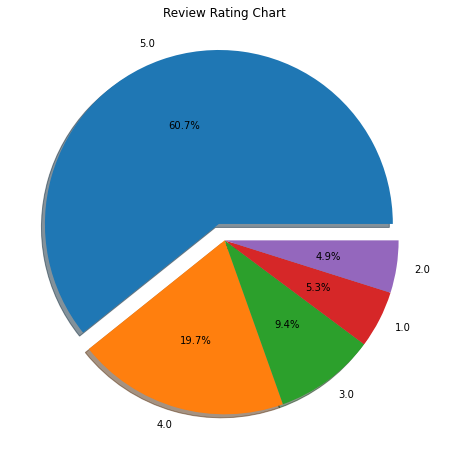

In [9]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Review Rating Chart')
plt.show()

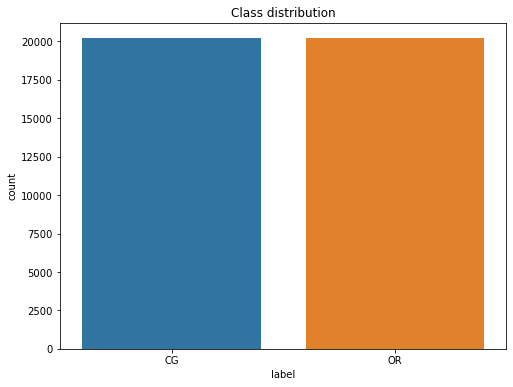

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.title('Class distribution')
plt.show()

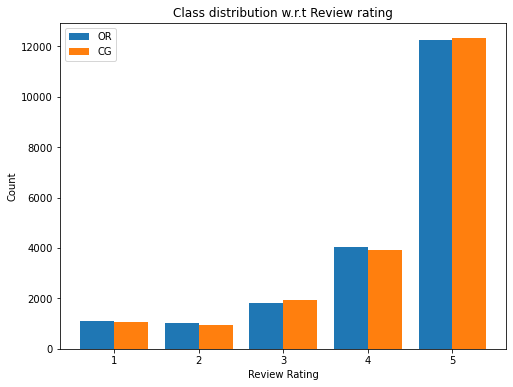

In [11]:
labels = df['rating'].value_counts().keys()
y1 = df[df.label.str.strip() == 'OR']['rating'].value_counts().values
y2 = df[df.label.str.strip() == 'CG']['rating'].value_counts().values
width = 0.40
  
# plot data in grouped manner of bar type
plt.figure(figsize=(8,6))
plt.bar(labels-0.2, y1, width)
plt.bar(labels+0.2, y2, width)
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.legend(["OR", "CG"])
plt.title('Class distribution w.r.t Review rating')
plt.show()

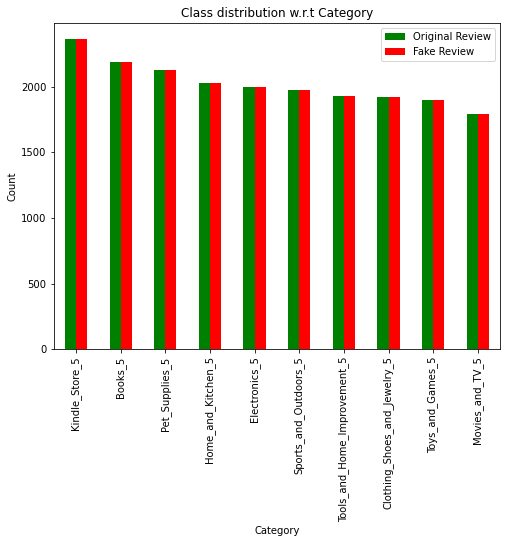

In [12]:
labels = df['category'].value_counts().keys().tolist()
y1 = df[df.label.str.strip() == 'OR']['category'].value_counts().values.tolist()
y2 = df[df.label.str.strip() == 'CG']['category'].value_counts().values.tolist()


df_ = pd.DataFrame({'Original Review': y1,
                    'Fake Review': y2}, index=labels)


ax = df_.plot.bar(rot=0, color={"Original Review": "green", "Fake Review": "red"},figsize=(8,6))
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title('Class distribution w.r.t Category')
plt.show()

In [13]:
df['length'] = df['text_'].apply(len)

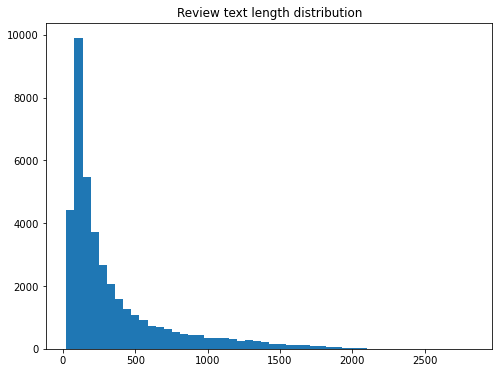

In [14]:
plt.figure(figsize=(8,6))
plt.hist(df['length'],bins=50)
plt.title('Review text length distribution')
plt.show()

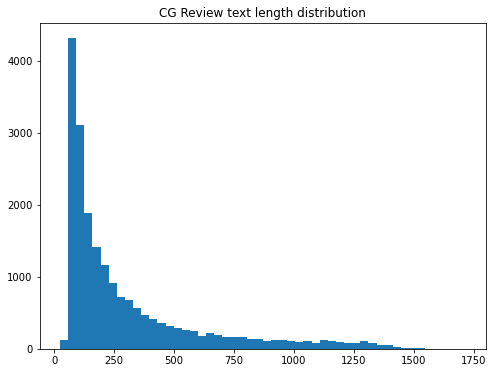

In [15]:
plt.figure(figsize=(8,6))
plt.hist(df[df['label'] == 'CG']['length'],bins=50)
plt.title('CG Review text length distribution')
plt.show()

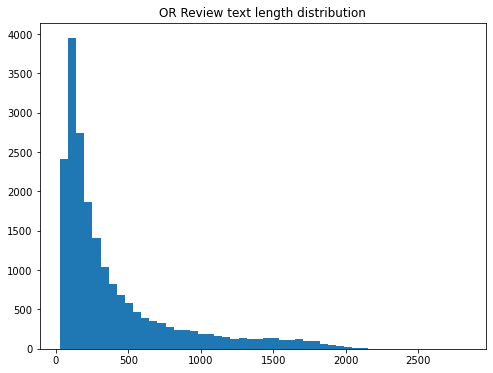

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df[df['label'] == 'OR']['length'],bins=50)
plt.title('OR Review text length distribution')
plt.show()

In [17]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     305.573506  307.037430  24.0   96.0  174.0  383.0  1717.0  
OR     396.970419  418.428047  28.0  121.0  224.0  498.0  2827.0

----------------------------------------------------------------------------------------------------

In [18]:
wn = WordNetLemmatizer()

In [19]:
# Pre-Processed News Dataset 1
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. lemmatize words

from string import punctuation

def lemmatize_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in lemmatized_words)
    
    return cleaned_news_excerpt

In [20]:
# Pre-Processed News Dataset 2
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. stem words

def stemmed_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Stem words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in stemmed_words)
    
    return cleaned_news_excerpt

In [21]:
# Pre-Processed News Dataset 3
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation

def preprocess_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in words)
    
    return cleaned_news_excerpt

In [22]:
#df["lemmatized_text_"] = df["text_"].apply(lemmatize_preprocessed_news)
#df["stemmed_text_"] = df["text_"].apply(stemmed_preprocessed_news)
df["cleaned_text_"] = df["text_"].apply(preprocess_news)
#df["lemmatized_tokens"] = df["lemmatized_text_"].str.split(" ")
#df["stemmed_tokens"] = df["stemmed_text_"].str.split(" ")
df.head()

,category,rating,label,text_,length,cleaned_text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,love this well made sturdy comfortable love it...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,love it great upgrade original ive mine couple...
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,missing information use it great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,nice set good quality set two months


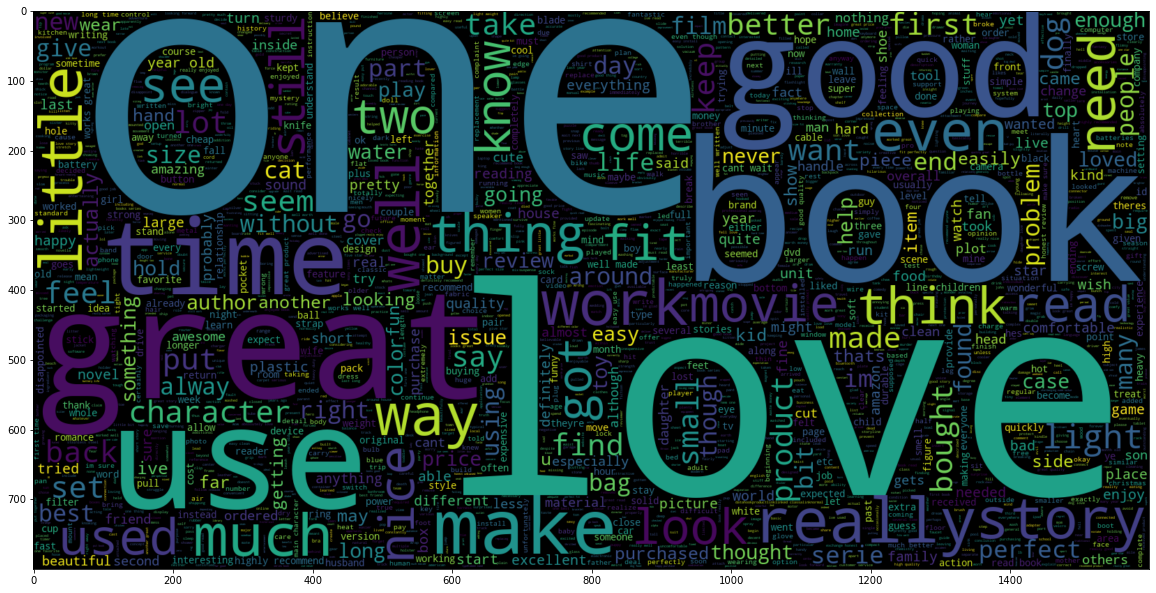

In [23]:
## word cloud of original reviews
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.label == 'OR'].cleaned_text_))
plt.imshow(wc, interpolation = 'bilinear')

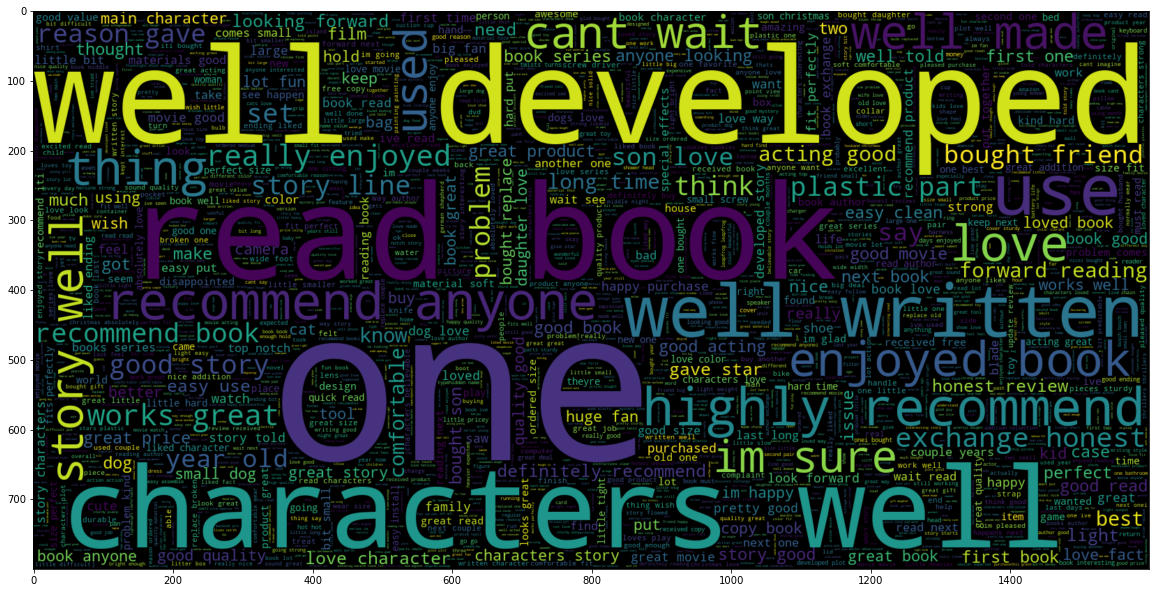

In [24]:
## word cloud of computer generated reviews
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.label == 'CG'].cleaned_text_))
plt.imshow(wc, interpolation = 'bilinear')

In [25]:
df.head()

,category,rating,label,text_,length,cleaned_text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,love this well made sturdy comfortable love it...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,love it great upgrade original ive mine couple...
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,missing information use it great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,nice set good quality set two months


In [26]:
## Train Test split
#X = df.drop(['label'], axis=1).copy()
#X = df[['category','rating','lemmatized_text_','stemmed_text_']].copy()
X = df[['category','rating','text_']].copy()
y= df['label'].copy()

In [27]:
X.dtypes

category     object
rating      float64
text_        object
dtype: object

In [28]:
y.dtype

dtype('O')

In [29]:
X.category = X.category.astype(str)
X.rating = X.rating.astype(str)

In [30]:
categories = X.category.unique().tolist()
ratings = X.rating.unique().tolist()

In [31]:
X.head()

,category,rating,text_
0,Home_and_Kitchen_5,5.0,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,Very nice set. Good quality. We have had the s...


In [32]:
y.head()

0    CG
1    CG
2    CG
3    CG
4    CG
Name: label, dtype: object

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

In [34]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (26280, 3)
x_test shape :  (14152, 3)
y_train shape :  (26280,)
y_test shape :  (14152,)


In [35]:
y_train.head()

33340    CG
32320    CG
37701    OR
38289    CG
32726    OR
Name: label, dtype: object

In [36]:
y_train.value_counts()

CG    13209
OR    13071
Name: label, dtype: int64

In [37]:
y_test.head()

249      CG
11842    CG
1553     CG
22954    CG
27703    OR
Name: label, dtype: object

In [38]:
y_test.value_counts()

OR    7145
CG    7007
Name: label, dtype: int64

In [39]:
y_train= preprocessing.label_binarize(y_train, classes =['CG','OR'])
y_test = preprocessing.label_binarize(y_test, classes =['CG','OR'])

In [40]:
## CG = 0; OR = 1
pd.DataFrame(y_train).head()

,0
0,0
1,0
2,1
3,0
4,1


In [41]:
## CG = 0; OR = 1
pd.DataFrame(y_test).head()

,0
0,0
1,0
2,0
3,0
4,1


In [42]:
x_train.head()

,category,rating,text_
33340,Toys_and_Games_5,5.0,My first ever after high school. The pieces ar...
32320,Books_5,5.0,"As a former Marine, I find it hard to believe ..."
37701,Clothing_Shoes_and_Jewelry_5,5.0,Carefully packed. Beautiful piece that looks ...
38289,Clothing_Shoes_and_Jewelry_5,5.0,Twelve cotton bandannas in white! I love the ...
32726,Books_5,4.0,Two Heart. One Hope. This series is so great! ...


In [43]:
categories

['Home_and_Kitchen_5',
 'Sports_and_Outdoors_5',
 'Electronics_5',
 'Movies_and_TV_5',
 'Tools_and_Home_Improvement_5',
 'Pet_Supplies_5',
 'Kindle_Store_5',
 'Books_5',
 'Toys_and_Games_5',
 'Clothing_Shoes_and_Jewelry_5']

In [44]:
ratings

['5.0', '1.0', '3.0', '2.0', '4.0']

In [45]:
ohe_transformer  = make_column_transformer(
    (OneHotEncoder(categories = [categories],handle_unknown='ignore',sparse=False),['category']),
    (OneHotEncoder(categories = [ratings],handle_unknown='ignore',sparse=False),['rating']),
    verbose=False,
    remainder='passthrough',
    n_jobs = -1)

In [46]:
ohe_x_train = ohe_transformer.fit_transform(x_train[['category','rating']])

ohe_category_cols = ohe_transformer.transformers_[0][1].get_feature_names_out( ['category']).tolist()
ohe_rating_cols = ohe_transformer.transformers_[1][1].get_feature_names_out( ['rating']).tolist()
ohe_cols = ohe_category_cols + ohe_rating_cols

x_train_ohe = pd.DataFrame(ohe_x_train, columns=ohe_cols)
x_train_ohe.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
x_train_ohe.shape

(26280, 15)

In [48]:
x_train[['category','rating']].head()

,category,rating
33340,Toys_and_Games_5,5.0
32320,Books_5,5.0
37701,Clothing_Shoes_and_Jewelry_5,5.0
38289,Clothing_Shoes_and_Jewelry_5,5.0
32726,Books_5,4.0


In [49]:
ohe_x_test = ohe_transformer.transform(x_test[['category','rating']])
x_test_ohe = pd.DataFrame(ohe_x_test, columns=ohe_cols)
x_test_ohe.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
x_test_ohe.shape

(14152, 15)

In [51]:
x_test[['category','rating']].head()

,category,rating
249,Home_and_Kitchen_5,5.0
11842,Electronics_5,5.0
1553,Home_and_Kitchen_5,5.0
22954,Pet_Supplies_5,1.0
27703,Kindle_Store_5,5.0


In [52]:
tfidf_vec1 = TfidfVectorizer(preprocessor= lemmatize_preprocessed_news)
tfidf_x_train_lemmatized_text = tfidf_vec1.fit_transform(x_train['text_'])
tfidf_x_train_lemmatized_text.shape

(26280, 36227)

In [53]:
x_train_tfifd_lemmatized_text = pd.DataFrame(tfidf_x_train_lemmatized_text.toarray(), columns = tfidf_vec1.get_feature_names())
x_train_tfifd_lemmatized_text.head()

,00,000,00199,00200,0061849278,007,009,00believe,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,09mm,0z,10,100,1000,10000,100000,10001,1000mah,1000piece,1001,100150,100200,100300,10082015,...,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,zipline,ziploc,ziplock,ziplocks,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombicide,zombie,zombieland,zon,zondervan,zone,zoo,zoodles,zoologist,zoom,zoomer,zooming,zoophiles,zootopia,zord,zorro,zpiiers,zs20,zt,zucchini,zuchinni,zumba,zuppies,zurg,zyliss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
tfidf_x_test_lemmatized_text = tfidf_vec1.transform(x_test['text_'])
tfidf_x_test_lemmatized_text.shape

(14152, 36227)

In [55]:
x_test_tfifd_lemmatized_text = pd.DataFrame(tfidf_x_test_lemmatized_text.toarray(), columns = tfidf_vec1.get_feature_names())
x_test_tfifd_lemmatized_text.head()

,00,000,00199,00200,0061849278,007,009,00believe,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,09mm,0z,10,100,1000,10000,100000,10001,1000mah,1000piece,1001,100150,100200,100300,10082015,...,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,zipline,ziploc,ziplock,ziplocks,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombicide,zombie,zombieland,zon,zondervan,zone,zoo,zoodles,zoologist,zoom,zoomer,zooming,zoophiles,zootopia,zord,zorro,zpiiers,zs20,zt,zucchini,zuchinni,zumba,zuppies,zurg,zyliss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
tfidf_vec2 = TfidfVectorizer(preprocessor=stemmed_preprocessed_news)
tfidf_x_train_stemmed_text = tfidf_vec2.fit_transform(x_train['text_'])
tfidf_x_train_stemmed_text.shape

(26280, 29265)

In [57]:
x_train_tfifd_stemmed_text = pd.DataFrame(tfidf_x_train_stemmed_text.toarray(), columns = tfidf_vec2.get_feature_names())
x_train_tfifd_stemmed_text.head()

,00,000,00199,00200,0061849278,007,009,00believ,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,09mm,0z,10,100,1000,10000,100000,10001,1000mah,1000piec,1001,100150,100200,100300,10082015,...,zignatur,zilch,zill,zillion,zillionz,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,ziplin,ziploc,ziplock,zipper,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombi,zombicid,zombieland,zon,zondervan,zone,zoo,zoodl,zoologist,zoom,zoomer,zoophil,zootopia,zord,zorro,zpiier,zs20,zt,zucchini,zuchinni,zumba,zuppi,zurg,zyliss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
tfidf_x_test_stemmed_text = tfidf_vec2.transform(x_test['text_'])
tfidf_x_test_stemmed_text.shape

(14152, 29265)

In [59]:
x_test_tfifd_stemmed_text = pd.DataFrame(tfidf_x_test_stemmed_text.toarray(), columns = tfidf_vec2.get_feature_names())
x_test_tfifd_stemmed_text.head()

,00,000,00199,00200,0061849278,007,009,00believ,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,09mm,0z,10,100,1000,10000,100000,10001,1000mah,1000piec,1001,100150,100200,100300,10082015,...,zignatur,zilch,zill,zillion,zillionz,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,ziplin,ziploc,ziplock,zipper,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombi,zombicid,zombieland,zon,zondervan,zone,zoo,zoodl,zoologist,zoom,zoomer,zoophil,zootopia,zord,zorro,zpiier,zs20,zt,zucchini,zuchinni,zumba,zuppi,zurg,zyliss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
## Encoded x_train
#x_train_ohe + x_train_tfifd_lemmatized_text
x_train_lemmatized = pd.concat([x_train_ohe, x_train_tfifd_lemmatized_text], axis=1)

#x_train_ohe + x_train_tfifd_stemmed_text
x_train_stemmed = pd.concat([x_train_ohe, x_train_tfifd_stemmed_text], axis=1)

print('x_train_lemmatized shape : ',x_train_lemmatized.shape)
print('x_train_stemmed shape : ',x_train_stemmed.shape)

x_train_lemmatized shape :  (26280, 36242)
x_train_stemmed shape :  (26280, 29280)


In [61]:
x_train_lemmatized.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,00199,00200,0061849278,007,009,00believe,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,...,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,zipline,ziploc,ziplock,ziplocks,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombicide,zombie,zombieland,zon,zondervan,zone,zoo,zoodles,zoologist,zoom,zoomer,zooming,zoophiles,zootopia,zord,zorro,zpiiers,zs20,zt,zucchini,zuchinni,zumba,zuppies,zurg,zyliss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
x_train_stemmed.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,00199,00200,0061849278,007,009,00believ,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,...,zignatur,zilch,zill,zillion,zillionz,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,ziplin,ziploc,ziplock,zipper,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombi,zombicid,zombieland,zon,zondervan,zone,zoo,zoodl,zoologist,zoom,zoomer,zoophil,zootopia,zord,zorro,zpiier,zs20,zt,zucchini,zuchinni,zumba,zuppi,zurg,zyliss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
## Encoded x_test
#x_test_ohe + x_test_tfifd_lemmatized_text
x_test_lemmatized = pd.concat([x_test_ohe, x_test_tfifd_lemmatized_text], axis=1)
#x_test_ohe + x_test_tfifd_stemmed_text
x_test_stemmed = pd.concat([x_test_ohe, x_test_tfifd_stemmed_text], axis=1)

print('x_test_lemmatized shape : ',x_test_lemmatized.shape)
print('x_test_stemmed shape : ',x_test_stemmed.shape)

x_test_lemmatized shape :  (14152, 36242)
x_test_stemmed shape :  (14152, 29280)


In [64]:
x_test_lemmatized.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,00199,00200,0061849278,007,009,00believe,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,...,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,zipline,ziploc,ziplock,ziplocks,zipped,zipper,zippered,zipping,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombicide,zombie,zombieland,zon,zondervan,zone,zoo,zoodles,zoologist,zoom,zoomer,zooming,zoophiles,zootopia,zord,zorro,zpiiers,zs20,zt,zucchini,zuchinni,zumba,zuppies,zurg,zyliss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
x_test_stemmed.head()

,category_Home_and_Kitchen_5,category_Sports_and_Outdoors_5,category_Electronics_5,category_Movies_and_TV_5,category_Tools_and_Home_Improvement_5,category_Pet_Supplies_5,category_Kindle_Store_5,category_Books_5,category_Toys_and_Games_5,category_Clothing_Shoes_and_Jewelry_5,rating_5.0,rating_1.0,rating_3.0,rating_2.0,rating_4.0,00,000,00199,00200,0061849278,007,009,00believ,010,01192015,013014,01302016,014,016,0182196,01oz,021114,02262015,024,02v,03292015,04112017,041715,045day,055xprob,05mm,06,06132016,061515,062015,07,08,080,089,09,...,zignatur,zilch,zill,zillion,zillionz,zim,zimmerman,zinc,zing,zinger,zinn,zio,zip,ziplin,ziploc,ziplock,zipper,zippo,zipsup,ziptop,zipup,ziti,zoe,zoeller,zoey,zojirushi,zombi,zombicid,zombieland,zon,zondervan,zone,zoo,zoodl,zoologist,zoom,zoomer,zoophil,zootopia,zord,zorro,zpiier,zs20,zt,zucchini,zuchinni,zumba,zuppi,zurg,zyliss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-----------------------------------------------------------------------

#### Modeling

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [67]:
def print_metrics(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print('Confusion matrix\n', cm)
    print('True Positives(TP) = ', cm[1,1])
    print('True Negatives(TN) = ', cm[0,0])
    print('False Positives(FP) = ', cm[0,1])
    print('False Negatives(FN) = ', cm[1,0])
    cm_matrix = pd.DataFrame(data=cm, columns=['Predict:CG', 'Predict:OR'], 
                             index=['Actual:CG', 'Actual:OR'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    print(classification_report(y_true, y_pred))
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
    ## classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.4f}'.format(classification_error))
    ## precision score
    precision = TP / float(TP + FP)
    print('Precision : {0:0.4f}'.format(precision))
    ## recall 
    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.4f}'.format(recall))
    ## specificity
    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity))
    ## F-1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print('F-1 score : {0:0.4f}'.format(f1))

#### LogisticRegression (lemmatized data)

Confusion matrix
 [[11768  1441]
 [ 1010 12061]]
True Positives(TP) =  12061
True Negatives(TN) =  11768
False Positives(FP) =  1441
False Negatives(FN) =  1010
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     13209
           1       0.89      0.92      0.91     13071

    accuracy                           0.91     26280
   macro avg       0.91      0.91      0.91     26280
weighted avg       0.91      0.91      0.91     26280

Classification accuracy : 0.9067
Classification error : 0.0933
Precision : 0.8933
Recall or Sensitivity : 0.9227
Specificity : 0.8909
F-1 score : 0.9078


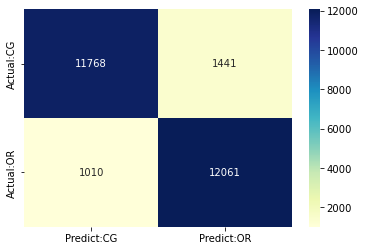

In [68]:
lrg_l = LogisticRegression(solver='liblinear')
lrg_l.fit(x_train_lemmatized,y_train)

y_train_predict = lrg_l.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)    

In [69]:
pd.DataFrame(y_train_predict).value_counts()

1    13502
0    12778
dtype: int64

Confusion matrix
 [[5978 1029]
 [ 779 6366]]
True Positives(TP) =  6366
True Negatives(TN) =  5978
False Positives(FP) =  1029
False Negatives(FN) =  779
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7007
           1       0.86      0.89      0.88      7145

    accuracy                           0.87     14152
   macro avg       0.87      0.87      0.87     14152
weighted avg       0.87      0.87      0.87     14152

Classification accuracy : 0.8722
Classification error : 0.1278
Precision : 0.8609
Recall or Sensitivity : 0.8910
Specificity : 0.8531
F-1 score : 0.8757


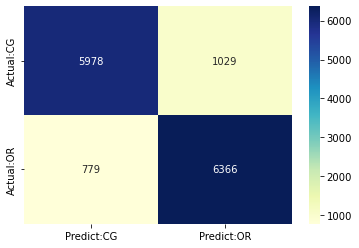

In [70]:
y_test_predict = lrg_l.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

In [71]:
pd.DataFrame(y_test_predict).value_counts()

1    7395
0    6757
dtype: int64

#### LogisticRegression (stemmed data)

Confusion matrix
 [[11672  1537]
 [ 1139 11932]]
True Positives(TP) =  11932
True Negatives(TN) =  11672
False Positives(FP) =  1537
False Negatives(FN) =  1139
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     13209
           1       0.89      0.91      0.90     13071

    accuracy                           0.90     26280
   macro avg       0.90      0.90      0.90     26280
weighted avg       0.90      0.90      0.90     26280

Classification accuracy : 0.8982
Classification error : 0.1018
Precision : 0.8859
Recall or Sensitivity : 0.9129
Specificity : 0.8836
F-1 score : 0.8992


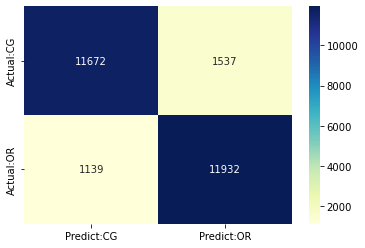

In [72]:
lrg_s = LogisticRegression(solver='liblinear')
lrg_s.fit(x_train_stemmed,y_train)

y_train_predict = lrg_s.predict(x_train_stemmed)
print_metrics(y_train, y_train_predict)

Confusion matrix
 [[5995 1012]
 [ 849 6296]]
True Positives(TP) =  6296
True Negatives(TN) =  5995
False Positives(FP) =  1012
False Negatives(FN) =  849
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7007
           1       0.86      0.88      0.87      7145

    accuracy                           0.87     14152
   macro avg       0.87      0.87      0.87     14152
weighted avg       0.87      0.87      0.87     14152

Classification accuracy : 0.8685
Classification error : 0.1315
Precision : 0.8615
Recall or Sensitivity : 0.8812
Specificity : 0.8556
F-1 score : 0.8712


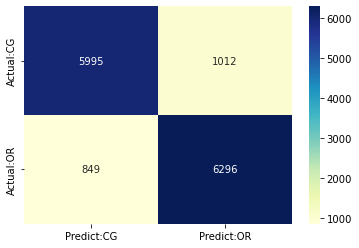

In [73]:
y_test_predict = lrg_s.predict(x_test_stemmed)
print_metrics(y_test, y_test_predict)

#### MultinomialNB (lemmatized data)

Confusion matrix
 [[12589   620]
 [ 2373 10698]]
True Positives(TP) =  10698
True Negatives(TN) =  12589
False Positives(FP) =  620
False Negatives(FN) =  2373
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     13209
           1       0.95      0.82      0.88     13071

    accuracy                           0.89     26280
   macro avg       0.89      0.89      0.89     26280
weighted avg       0.89      0.89      0.89     26280

Classification accuracy : 0.8861
Classification error : 0.1139
Precision : 0.9452
Recall or Sensitivity : 0.8185
Specificity : 0.9531
F-1 score : 0.8773


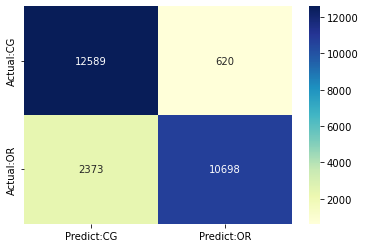

In [74]:
mnb_l = MultinomialNB()
mnb_l.fit(x_train_lemmatized,y_train)

y_train_predict = mnb_l.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)    

Confusion matrix
 [[6485  522]
 [1592 5553]]
True Positives(TP) =  5553
True Negatives(TN) =  6485
False Positives(FP) =  522
False Negatives(FN) =  1592
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7007
           1       0.91      0.78      0.84      7145

    accuracy                           0.85     14152
   macro avg       0.86      0.85      0.85     14152
weighted avg       0.86      0.85      0.85     14152

Classification accuracy : 0.8506
Classification error : 0.1494
Precision : 0.9141
Recall or Sensitivity : 0.7772
Specificity : 0.9255
F-1 score : 0.8401


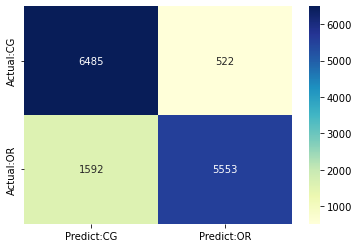

In [75]:
y_test_predict = mnb_l.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

#### MultinomialNB (stemmed data)

Confusion matrix
 [[12420   789]
 [ 2350 10721]]
True Positives(TP) =  10721
True Negatives(TN) =  12420
False Positives(FP) =  789
False Negatives(FN) =  2350
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13209
           1       0.93      0.82      0.87     13071

    accuracy                           0.88     26280
   macro avg       0.89      0.88      0.88     26280
weighted avg       0.89      0.88      0.88     26280

Classification accuracy : 0.8806
Classification error : 0.1194
Precision : 0.9315
Recall or Sensitivity : 0.8202
Specificity : 0.9403
F-1 score : 0.8723


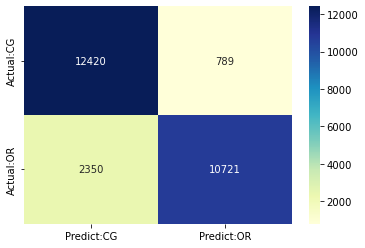

In [76]:
mnb_s = MultinomialNB()
mnb_s.fit(x_train_stemmed,y_train)

y_train_predict = mnb_s.predict(x_train_stemmed)
print_metrics(y_train, y_train_predict)

Confusion matrix
 [[6397  610]
 [1522 5623]]
True Positives(TP) =  5623
True Negatives(TN) =  6397
False Positives(FP) =  610
False Negatives(FN) =  1522
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      7007
           1       0.90      0.79      0.84      7145

    accuracy                           0.85     14152
   macro avg       0.85      0.85      0.85     14152
weighted avg       0.86      0.85      0.85     14152

Classification accuracy : 0.8493
Classification error : 0.1507
Precision : 0.9021
Recall or Sensitivity : 0.7870
Specificity : 0.9129
F-1 score : 0.8406


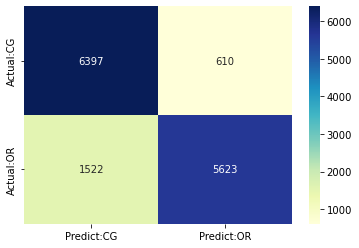

In [77]:
y_test_predict = mnb_s.predict(x_test_stemmed)
print_metrics(y_test, y_test_predict)

#### RandomForestClassifier (lemmatized data)

Confusion matrix
 [[13209     0]
 [    0 13071]]
True Positives(TP) =  13071
True Negatives(TN) =  13209
False Positives(FP) =  0
False Negatives(FN) =  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13209
           1       1.00      1.00      1.00     13071

    accuracy                           1.00     26280
   macro avg       1.00      1.00      1.00     26280
weighted avg       1.00      1.00      1.00     26280

Classification accuracy : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
Specificity : 1.0000
F-1 score : 1.0000


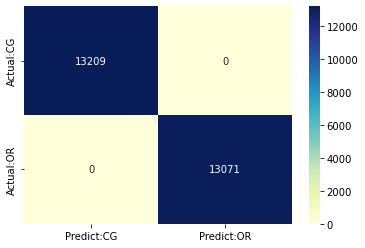

In [78]:
rfc_l = RandomForestClassifier()
rfc_l.fit(x_train_lemmatized,y_train)

y_train_predict = rfc_l.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)    

Confusion matrix
 [[6308  699]
 [1452 5693]]
True Positives(TP) =  5693
True Negatives(TN) =  6308
False Positives(FP) =  699
False Negatives(FN) =  1452
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      7007
           1       0.89      0.80      0.84      7145

    accuracy                           0.85     14152
   macro avg       0.85      0.85      0.85     14152
weighted avg       0.85      0.85      0.85     14152

Classification accuracy : 0.8480
Classification error : 0.1520
Precision : 0.8906
Recall or Sensitivity : 0.7968
Specificity : 0.9002
F-1 score : 0.8411


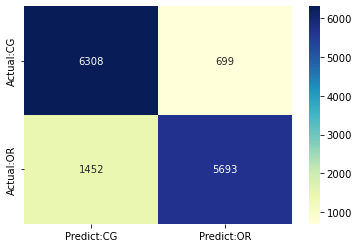

In [79]:
y_test_predict = rfc_l.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

#### RandomForestClassifier (stemmed data)

Confusion matrix
 [[13209     0]
 [    0 13071]]
True Positives(TP) =  13071
True Negatives(TN) =  13209
False Positives(FP) =  0
False Negatives(FN) =  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13209
           1       1.00      1.00      1.00     13071

    accuracy                           1.00     26280
   macro avg       1.00      1.00      1.00     26280
weighted avg       1.00      1.00      1.00     26280

Classification accuracy : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
Specificity : 1.0000
F-1 score : 1.0000


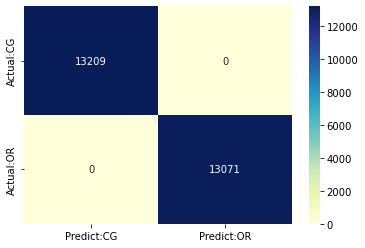

In [80]:
rfc_s = RandomForestClassifier()
rfc_s.fit(x_train_stemmed,y_train)

y_train_predict = rfc_s.predict(x_train_stemmed)
print_metrics(y_train, y_train_predict)

Confusion matrix
 [[6258  749]
 [1438 5707]]
True Positives(TP) =  5707
True Negatives(TN) =  6258
False Positives(FP) =  749
False Negatives(FN) =  1438
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      7007
           1       0.88      0.80      0.84      7145

    accuracy                           0.85     14152
   macro avg       0.85      0.85      0.85     14152
weighted avg       0.85      0.85      0.85     14152

Classification accuracy : 0.8455
Classification error : 0.1545
Precision : 0.8840
Recall or Sensitivity : 0.7987
Specificity : 0.8931
F-1 score : 0.8392


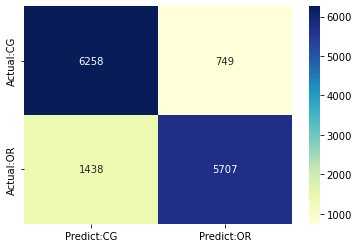

In [81]:
y_test_predict = rfc_s.predict(x_test_stemmed)
print_metrics(y_test, y_test_predict)

#### AdaBoostClassifier (lemmatized data)

Confusion matrix
 [[10355  2854]
 [ 2226 10845]]
True Positives(TP) =  10845
True Negatives(TN) =  10355
False Positives(FP) =  2854
False Negatives(FN) =  2226
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     13209
           1       0.79      0.83      0.81     13071

    accuracy                           0.81     26280
   macro avg       0.81      0.81      0.81     26280
weighted avg       0.81      0.81      0.81     26280

Classification accuracy : 0.8067
Classification error : 0.1933
Precision : 0.7917
Recall or Sensitivity : 0.8297
Specificity : 0.7839
F-1 score : 0.8102


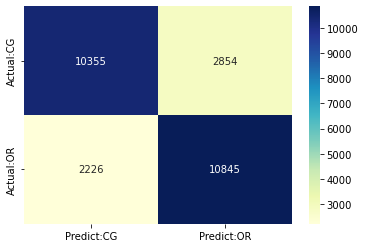

In [82]:
ada_l = AdaBoostClassifier(n_estimators=100)
ada_l.fit(x_train_lemmatized,y_train)

y_train_predict = ada_l.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)    

Confusion matrix
 [[5475 1532]
 [1392 5753]]
True Positives(TP) =  5753
True Negatives(TN) =  5475
False Positives(FP) =  1532
False Negatives(FN) =  1392
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      7007
           1       0.79      0.81      0.80      7145

    accuracy                           0.79     14152
   macro avg       0.79      0.79      0.79     14152
weighted avg       0.79      0.79      0.79     14152

Classification accuracy : 0.7934
Classification error : 0.2066
Precision : 0.7897
Recall or Sensitivity : 0.8052
Specificity : 0.7814
F-1 score : 0.7974


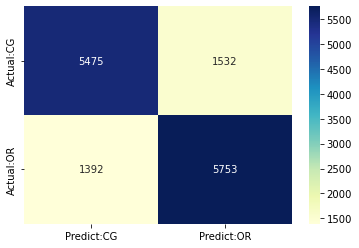

In [83]:
y_test_predict = ada_l.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

#### AdaBoostClassifier (stemmed data)

Confusion matrix
 [[10362  2847]
 [ 2346 10725]]
True Positives(TP) =  10725
True Negatives(TN) =  10362
False Positives(FP) =  2847
False Negatives(FN) =  2346
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     13209
           1       0.79      0.82      0.81     13071

    accuracy                           0.80     26280
   macro avg       0.80      0.80      0.80     26280
weighted avg       0.80      0.80      0.80     26280

Classification accuracy : 0.8024
Classification error : 0.1976
Precision : 0.7902
Recall or Sensitivity : 0.8205
Specificity : 0.7845
F-1 score : 0.8051


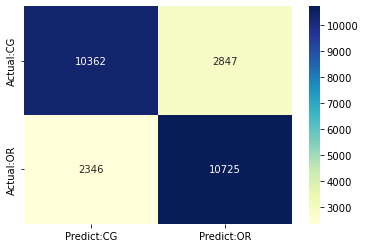

In [84]:
ada_s = AdaBoostClassifier(n_estimators=100)
ada_s.fit(x_train_stemmed,y_train)

y_train_predict = ada_s.predict(x_train_stemmed)
print_metrics(y_train, y_train_predict)

Confusion matrix
 [[5462 1545]
 [1499 5646]]
True Positives(TP) =  5646
True Negatives(TN) =  5462
False Positives(FP) =  1545
False Negatives(FN) =  1499
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7007
           1       0.79      0.79      0.79      7145

    accuracy                           0.78     14152
   macro avg       0.78      0.78      0.78     14152
weighted avg       0.78      0.78      0.78     14152

Classification accuracy : 0.7849
Classification error : 0.2151
Precision : 0.7851
Recall or Sensitivity : 0.7902
Specificity : 0.7795
F-1 score : 0.7877


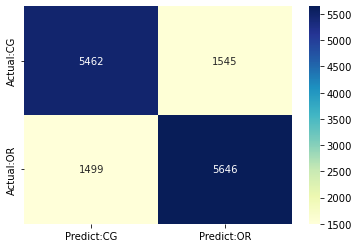

In [85]:
y_test_predict = ada_s.predict(x_test_stemmed)
print_metrics(y_test, y_test_predict)

#### PassiveAggressiveClassifier (lemmatized data)

Confusion matrix
 [[13071   138]
 [  737 12334]]
True Positives(TP) =  12334
True Negatives(TN) =  13071
False Positives(FP) =  138
False Negatives(FN) =  737
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13209
           1       0.99      0.94      0.97     13071

    accuracy                           0.97     26280
   macro avg       0.97      0.97      0.97     26280
weighted avg       0.97      0.97      0.97     26280

Classification accuracy : 0.9667
Classification error : 0.0333
Precision : 0.9889
Recall or Sensitivity : 0.9436
Specificity : 0.9896
F-1 score : 0.9657


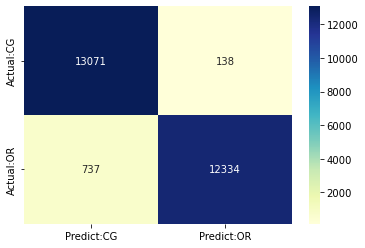

In [86]:
pac_l = PassiveAggressiveClassifier()
pac_l.fit(x_train_lemmatized,y_train)

y_train_predict = pac_l.predict(x_train_lemmatized)
print_metrics(y_train, y_train_predict)    

Confusion matrix
 [[6306  701]
 [1642 5503]]
True Positives(TP) =  5503
True Negatives(TN) =  6306
False Positives(FP) =  701
False Negatives(FN) =  1642
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      7007
           1       0.89      0.77      0.82      7145

    accuracy                           0.83     14152
   macro avg       0.84      0.84      0.83     14152
weighted avg       0.84      0.83      0.83     14152

Classification accuracy : 0.8344
Classification error : 0.1656
Precision : 0.8870
Recall or Sensitivity : 0.7702
Specificity : 0.9000
F-1 score : 0.8245


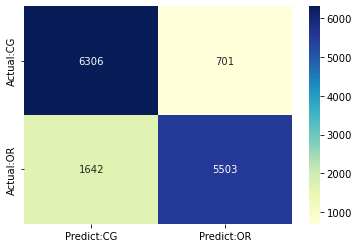

In [87]:
y_test_predict = pac_l.predict(x_test_lemmatized)
print_metrics(y_test, y_test_predict)

#### PassiveAggressiveClassifier (stemmed data)

Confusion matrix
 [[13113    96]
 [ 2856 10215]]
True Positives(TP) =  10215
True Negatives(TN) =  13113
False Positives(FP) =  96
False Negatives(FN) =  2856
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     13209
           1       0.99      0.78      0.87     13071

    accuracy                           0.89     26280
   macro avg       0.91      0.89      0.89     26280
weighted avg       0.91      0.89      0.89     26280

Classification accuracy : 0.8877
Classification error : 0.1123
Precision : 0.9907
Recall or Sensitivity : 0.7815
Specificity : 0.9927
F-1 score : 0.8737


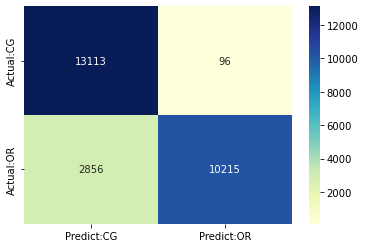

In [88]:
pac_s = PassiveAggressiveClassifier()
pac_s.fit(x_train_stemmed,y_train)

y_train_predict = pac_s.predict(x_train_stemmed)
print_metrics(y_train, y_train_predict)

Confusion matrix
 [[6625  382]
 [2454 4691]]
True Positives(TP) =  4691
True Negatives(TN) =  6625
False Positives(FP) =  382
False Negatives(FN) =  2454
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      7007
           1       0.92      0.66      0.77      7145

    accuracy                           0.80     14152
   macro avg       0.83      0.80      0.80     14152
weighted avg       0.83      0.80      0.80     14152

Classification accuracy : 0.7996
Classification error : 0.2004
Precision : 0.9247
Recall or Sensitivity : 0.6565
Specificity : 0.9455
F-1 score : 0.7679


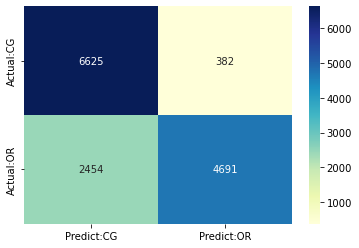

In [89]:
y_test_predict = pac_s.predict(x_test_stemmed)
print_metrics(y_test, y_test_predict)